### 1. What is the accuracy of your model on the test data?

On testing data, the accuracy of my model is 88.5%. 

### 2. Provide a confusion matrix between the groundtruth and predicted labels in the test dataset. The rows should correspond to the groundtruth categories and the columns to predicted categories. The confusion matrix here should have raw datapoint counts and should not be normalized as percentages.

\begin{bmatrix}323.&0.&3.&4.&0.&0.&3.&2.&1.&5\\0.&380.&0.&0.&1.&1.&1.&6.&2.&1.\\5.&0.&321.&8.&6.&0.&5.&6.&5.&5.\\17.&0.&9.&290.&4.&0.&4.&3.&4.&8.\\3.&0.&5.&1.&286.&0.&5.&26.&11.&8.\\1.&1.&1.&0.&0.&329.&1.&2.&1.&1.\\3.&0.&2.&5.&17.&4.&247.&16.&4.&11.\\0.&0.&6.&1.&25.&2.&7.&260.&12.&3.\\5.&4.&2.&5.&28.&1.&4.&13.&267.&3.\\2.&1.&1.&1.&0.&2.&1.&0.&3.&234.\end{bmatrix}

### 3. Now normalize the raw confusion matrix reported in the previous question by dividing each row by the sum of all its elements. Include this normalized confusion matrix in your report.

\begin{bmatrix}0.94721408&0.&0.00879765&0.01173021&0.&0.&0.00879765&0.0058651&0.00293255&0.01466276\\0.&0.96938776&0.&0.&0.00255102&0.00255102&0.00255102&0.01530612&0.00510204&0.00255102\\0.01385042&0.&0.88919668&0.02216066&0.0166205&0.&0.01385042&0.0166205&0.01385042&0.01385042\\0.05014749&0.&0.02654867&0.85545723&0.01179941&0.&0.01179941&0.00884956&0.01179941&0.02359882\\0.00869565&0.&0.01449275&0.00289855&0.82898551&0.&0.01449275&0.07536232&0.03188406&0.02318841\\0.00296736&0.00296736&0.00296736&0.&0.&0.97626113&0.00296736&0.00593472&0.00296736&0.00296736\\0.00970874&0.&0.00647249&0.01618123&0.05501618&0.01294498&0.79935275&0.05177994&0.01294498&0.03559871\\0.&0.&0.01898734&0.00316456&0.07911392&0.00632911&0.0221519&0.82278481&0.03797468&0.00949367\\0.01506024&0.01204819&0.0060241&0.01506024&0.08433735&0.00301205&0.01204819&0.03915663&0.80421687&0.00903614\\0.00816327&0.00408163&0.00408163&0.00408163&0.&0.00816327&0.00408163&0.&0.0122449&0.95510204\end{bmatrix}

### 4. Which is the category that is most accurately predicted? Hint: Interpret the normalized confusion matrix.

Comparing the diagonal entries of the normalized confusion matrix, the value is largest when class = 5 (Itsukushima Shrine, Japan) with accuracy = 0.976. 

### 5. Which is the category that is least accurately predicted? Which other category is this least accurately predicted category most confused with in your predictions? Hint: Interpret the normalized confusion matrix.

Comparing the diagonal entries of the normalized confusion matrix, the value is smalles when class = 6 (Shanghai, China) with accuracy = 0.799. Among the pictures coming from class 6, 5.5% are predicted as class class 4 (Montreal, Canada) instead. 

### 6. For each category, calculate the precision and recall from the raw confusion matrix. Plot a grouped bar chart showing the precision and recall grouped by landmark category.

Precision for each class is: [0.89972145 0.98445596 0.91714286 0.92063492 0.77929155 0.97050147 0.88848921 0.77844311 0.86129032 0.83870968]

Recall for each class is: [0.94721408 0.96938776 0.88919668 0.85545723 0.82898551 0.97626113 0.79935275 0.82278481 0.80421687 0.95510204]

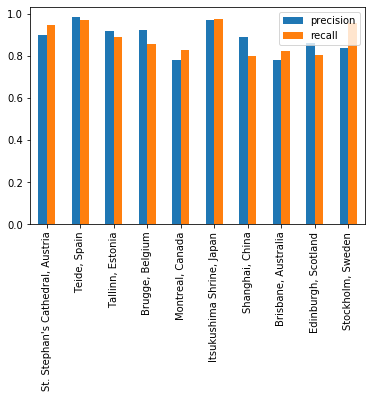

In [3]:
LANDMARK_DICT = {0:"St. Stephan's Cathedral, Austria",
             1:"Teide, Spain",
             2:"Tallinn, Estonia",
             3:"Brugge, Belgium",
             4:"Montreal, Canada",
             5:"Itsukushima Shrine, Japan",
             6:"Shanghai, China",
             7:"Brisbane, Australia",
             8:"Edinburgh, Scotland",
             9:"Stockholm, Sweden"}


df = pd.DataFrame()
df['precision'] = [0.89972145,0.98445596,0.91714286,0.92063492,0.77929155,0.97050147,0.88848921,0.77844311,0.86129032,0.83870968]
df['recall'] = [0.94721408,0.96938776,0.88919668,0.85545723,0.82898551,0.97626113,0.79935275,0.82278481,0.80421687,0.95510204]
df.index = LANDMARK_DICT.values()

df.plot(kind='bar')

In [2]:
from __future__ import print_function, division
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, models, transforms
import time
import copy
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode


In [4]:
training_frame = pd.read_csv('data/HW3_train.csv',header=None)
training_frame.columns = ["id","url","landmark_id"]
training_frame.head()

,id,url,landmark_id
0,6591289cabd732f4,https://lh5.googleusercontent.com/-HKHFxqtYvwI...,1
1,8f2b466365e50d6d,https://lh4.googleusercontent.com/-6rGTjHhEMi8...,8
2,2fe21b965b35da1c,https://lh4.googleusercontent.com/-gSeO2IssDuI...,5
3,45173683aa7d1ae6,http://lh4.ggpht.com/-S2etEHP1ATo/ThLefufLm0I/...,0
4,a0057b550dbea8e2,https://lh6.googleusercontent.com/-HUDp4PV4d9I...,8


In [5]:
training_frame.drop("url",axis=1,inplace=True)
training_frame["id"] = training_frame["id"]+".jpg"
training_frame.head()

,id,landmark_id
0,6591289cabd732f4.jpg,1
1,8f2b466365e50d6d.jpg,8
2,2fe21b965b35da1c.jpg,5
3,45173683aa7d1ae6.jpg,0
4,a0057b550dbea8e2.jpg,8


In [6]:
n = 0
img_name = training_frame.iloc[n, 0]
landmark_id = training_frame.iloc[n, 1]

print('Image name: {}'.format(img_name))
print('Landmark Id: {}'.format(landmark_id))

Image name: 6591289cabd732f4.jpg
Landmark Id: 1


In [7]:
# a helper function to read csv
def read_frame(file_location):
    df = pd.read_csv(file_location,header=None)
    df.columns = ["id","url","landmark_id"]
    df.drop("url",axis=1,inplace=True)
    df["id"] = df["id"]+".jpg"
    return df

In [8]:
 class LandmarkDataset(Dataset):
    """Landmark dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmark_mapping = read_frame(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.classes = self.landmark_mapping["landmark_id"].unique().tolist()

    def __len__(self):
        return len(self.landmark_mapping)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmark_mapping.iloc[idx, 0])
        image = io.imread(img_name)
        landmark_id = self.landmark_mapping.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return (image,landmark_id)

In [9]:
data_transforms = {
    'train': transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [10]:
IMAGE_PATH = "data/images"
TRAIN_LABEL = "data/HW3_train.csv"
VAL_LABEL = "data/HW3_test.csv"
LABEL_DICT = {"train":TRAIN_LABEL,"val":VAL_LABEL}

image_datasets = {x: LandmarkDataset(LABEL_DICT[x],IMAGE_PATH,data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=4,
                             shuffle=True, num_workers=16)
              for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print (dataset_sizes)
print (device)

{'train': 27000, 'val': 3317}
cpu


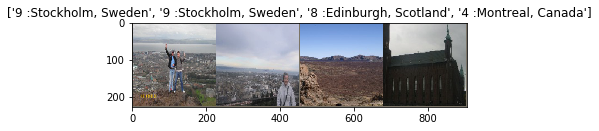

In [11]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[(str(class_names[x])+" :"+LANDMARK_DICT[class_names[x]]) for x in classes])

In [11]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [12]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [13]:
model_conv = torchvision.models.resnet18(pretrained=True)
# only update the parameters that we have just initialized for feature extract method
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(class_names))

# Send the model to GPU/CPU
model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [14]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 1.0717 Acc: 0.6562
val Loss: 0.5591 Acc: 0.8227

Epoch 1/24
----------
train Loss: 0.9637 Acc: 0.7002
val Loss: 0.4026 Acc: 0.8725

Epoch 2/24
----------
train Loss: 0.9194 Acc: 0.7129
val Loss: 0.4749 Acc: 0.8523

Epoch 3/24
----------
train Loss: 0.9217 Acc: 0.7130
val Loss: 0.4824 Acc: 0.8496

Epoch 4/24
----------
train Loss: 0.9360 Acc: 0.7079
val Loss: 0.5031 Acc: 0.8408

Epoch 5/24
----------
train Loss: 0.9255 Acc: 0.7134
val Loss: 0.4659 Acc: 0.8577

Epoch 6/24
----------
train Loss: 0.9211 Acc: 0.7153
val Loss: 0.4416 Acc: 0.8658

Epoch 7/24
----------
train Loss: 0.8047 Acc: 0.7428
val Loss: 0.3956 Acc: 0.8710

Epoch 8/24
----------
train Loss: 0.7911 Acc: 0.7517
val Loss: 0.3798 Acc: 0.8758

Epoch 9/24
----------
train Loss: 0.7914 Acc: 0.7465
val Loss: 0.4015 Acc: 0.8728

Epoch 10/24
----------
train Loss: 0.7813 Acc: 0.7508
val Loss: 0.3988 Acc: 0.8701

Epoch 11/24
----------
train Loss: 0.7822 Acc: 0.7476
val Loss: 0.3854 Acc: 0.8773

Ep

In [17]:
torch.save(model_conv, "model.pt")

In [4]:
model_conv = torch.load("model.pt")

In [40]:
def update_confusion_matrix(preds, labels, conf_matrix):
    preds = torch.max(preds, 1)[1]
    for t, p in zip(labels, preds):
        conf_matrix[t][p] += 1
    return conf_matrix
    
n = len(class_names)
conf_matrix = np.zeros((n,n))
for inputs, labels in dataloaders["val"]:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model_conv(inputs)
    conf_matrix = update_confusion_matrix(outputs, labels, conf_matrix)
print (conf_matrix)


[[323.   0.   3.   4.   0.   0.   3.   2.   1.   5.]
 [  0. 380.   0.   0.   1.   1.   1.   6.   2.   1.]
 [  5.   0. 321.   8.   6.   0.   5.   6.   5.   5.]
 [ 17.   0.   9. 290.   4.   0.   4.   3.   4.   8.]
 [  3.   0.   5.   1. 286.   0.   5.  26.  11.   8.]
 [  1.   1.   1.   0.   0. 329.   1.   2.   1.   1.]
 [  3.   0.   2.   5.  17.   4. 247.  16.   4.  11.]
 [  0.   0.   6.   1.  25.   2.   7. 260.  12.   3.]
 [  5.   4.   2.   5.  28.   1.   4.  13. 267.   3.]
 [  2.   1.   1.   1.   0.   2.   1.   0.   3. 234.]]


In [62]:
print(conf_matrix/(conf_matrix.dot(np.ones((n,1)))))

[[0.94721408 0.         0.00879765 0.01173021 0.         0.
  0.00879765 0.0058651  0.00293255 0.01466276]
 [0.         0.96938776 0.         0.         0.00255102 0.00255102
  0.00255102 0.01530612 0.00510204 0.00255102]
 [0.01385042 0.         0.88919668 0.02216066 0.0166205  0.
  0.01385042 0.0166205  0.01385042 0.01385042]
 [0.05014749 0.         0.02654867 0.85545723 0.01179941 0.
  0.01179941 0.00884956 0.01179941 0.02359882]
 [0.00869565 0.         0.01449275 0.00289855 0.82898551 0.
  0.01449275 0.07536232 0.03188406 0.02318841]
 [0.00296736 0.00296736 0.00296736 0.         0.         0.97626113
  0.00296736 0.00593472 0.00296736 0.00296736]
 [0.00970874 0.         0.00647249 0.01618123 0.05501618 0.01294498
  0.79935275 0.05177994 0.01294498 0.03559871]
 [0.         0.         0.01898734 0.00316456 0.07911392 0.00632911
  0.0221519  0.82278481 0.03797468 0.00949367]
 [0.01506024 0.01204819 0.0060241  0.01506024 0.08433735 0.00301205
  0.01204819 0.03915663 0.80421687 0.0090361

In [65]:
true_pos = np.diag(conf_matrix) 
precision = true_pos / np.sum(conf_matrix, axis=0)
recall = true_pos / np.sum(conf_matrix, axis=1)

In [66]:
print (precision)

[0.89972145 0.98445596 0.91714286 0.92063492 0.77929155 0.97050147
 0.88848921 0.77844311 0.86129032 0.83870968]


In [67]:
print (recall)

[0.94721408 0.96938776 0.88919668 0.85545723 0.82898551 0.97626113
 0.79935275 0.82278481 0.80421687 0.95510204]


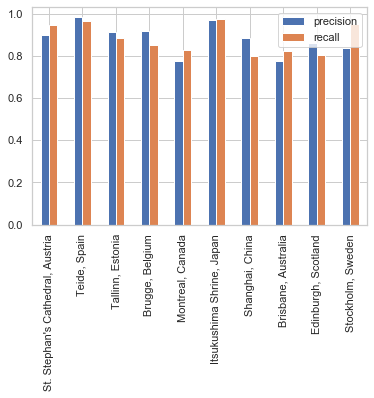

In [69]:
import seaborn as sns
sns.set(style="whitegrid")

df = pd.DataFrame()
df['precision'] = precision
df['recall'] = recall
df.index = LANDMARK_DICT.values()

df.plot(kind='bar')